In [1]:
# This notebook is based on the very helpfull blog
# https://pyscience.wordpress.com/2014/10/19/image-segmentation-with-python-and-simpleitk/

import os
import numpy
import SimpleITK
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
def sitk_show(img, title=None, margin=0.05, dpi=40, scale=2, interpolation=None):
    """
    scale is a scaling factor for the shown image
    """
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (scale + margin) * nda.shape[0] / dpi, (scale + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, scale - 2*margin, scale - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=interpolation)
    
    if title:
        plt.title(title)
    
    plt.show()

In [3]:
# Directory where the DICOM files are being stored (in this
# case the 'data/cropped_CT' folder). 
pathDicom = "../data/cropped_CT/"

# Z slice of the DICOM files to process. In the interest of
# simplicity, segmentation will be limited to a single 2D
# image but all processes are entirely applicable to the 3D image
idxSlice = 50

# int labels to assign to the segmented white and gray matter.
# These need to be different integers but their values themselves
# don't matter
labelPlastic = 1
labelFilling = 2

In [4]:
reader = SimpleITK.ImageSeriesReader()
filenamesDICOM = reader.GetGDCMSeriesFileNames(pathDicom)
reader.SetFileNames(filenamesDICOM)
imgOriginal = reader.Execute()

In [5]:
# For now we'll only look at a single 2D image
imgOriginal_slice = imgOriginal[:,:,idxSlice]

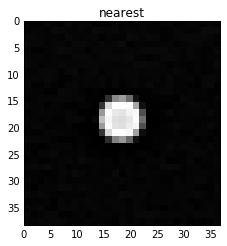

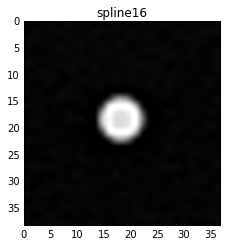

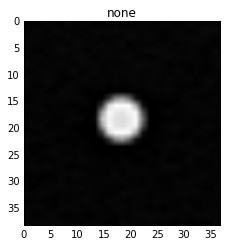

In [6]:
# and look at it
sitk_show(imgOriginal_slice, title="nearest", interpolation='nearest')
sitk_show(imgOriginal_slice, title="spline16", interpolation='spline16')
sitk_show(imgOriginal_slice, title="none")

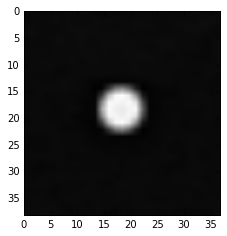

In [7]:
imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal_slice,
                                    timeStep=0.125,
                                    numberOfIterations=5)

# blurFilter = SimpleITK.CurvatureFlowImageFilter()
# blurFilter.SetNumberOfIterations(5)
# blurFilter.SetTimeStep(0.125)
# imgSmooth = blurFilter.Execute(imgOriginal)

sitk_show(imgSmooth)

In [8]:
lstSeeds = [(16,22)]

imgFilling = SimpleITK.ConnectedThreshold(image1=imgSmooth, 
                                              seedList=lstSeeds, 
                                              lower=130, 
                                              upper=190,
                                              replaceValue=labelFilling)